In [1]:
# add location to path and complete necessary class imports
import sys
sys.path.append('..')

from shipClass.System import System
from shipClass.SensedComp import SensedComp
from shipClass.Ship import Ship

Test #1: Ship with a single system

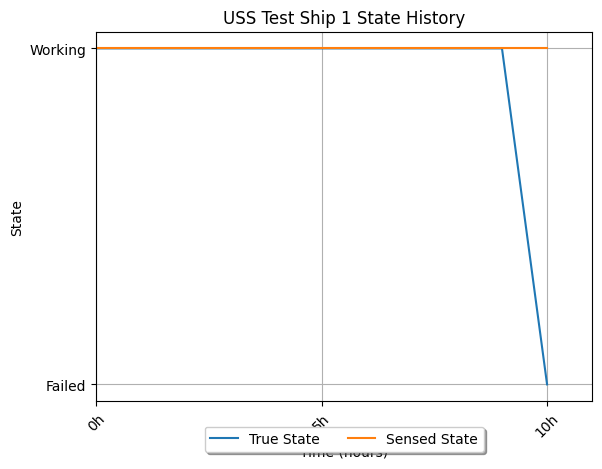

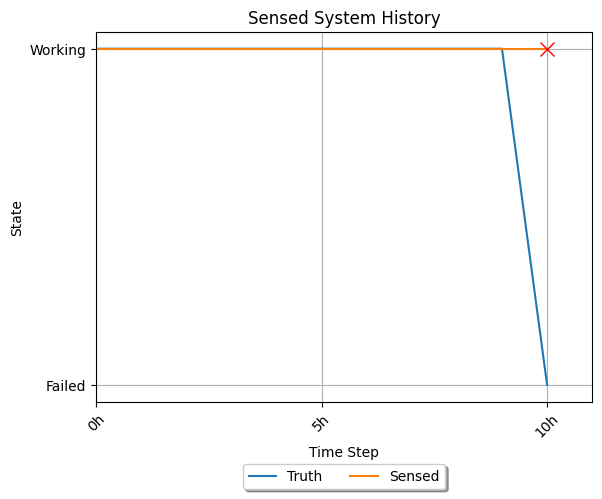

In [2]:
# initialize three default sensed components 
    # each comp has 2 states (0:failed and 1:working) 
sensed_comps = [SensedComp("SensedComp_"+str(i)) for i in range(3)]

# add the sensed components to a system
sys1 = System("Test_Sys_1", sensed_comps)

# add the system to a ship
ship1 = Ship("USS Test Ship 1", [sys1])

# simulate the ship until it fails
i=0
while ship1.state != 0:
    ship1.simulate(1)  # Simulate for 1 hour
    i += 1

# plot the simulation history of the ship and the system for comparison
ship1.plotHistory()
ship1.printHistory2Excel("testResults/Ship_w_Single_Sys.xlsx")

# plot the system history (should be the same as the shi for single system)
sys1.plotHistory()

Test #2: Ship with Multiple Systems in Series

In [3]:
# create a system with 4 sensed components (2 in parallel, 2 in series)
sys2_comps = [SensedComp() for _ in range(4)]
sys2 = System("Test System 2", sys2_comps, parallels=[(2,3)])

sys3_comps = [SensedComp() for _ in range(6)]
sys3 = System("Test System 3", sys3_comps, parallels=[(2,3), (4,5)])

# add the systems to a ship
ship2 = Ship("USS Tester (2 Systems)", [sys2, sys3])

# simulate the ship until it fails
i=0
while ship2.state != 0:
    ship2.simulate(1)  # Simulate for 1 hour
    i += 1

# plot the simulation history of the ship and the systems for comparison
# ship2.plotHistory()
ship2.printHistory2Excel("testResults/Ship_w_Series_Sys.xlsx")

Ship with Parallel Systems 

28


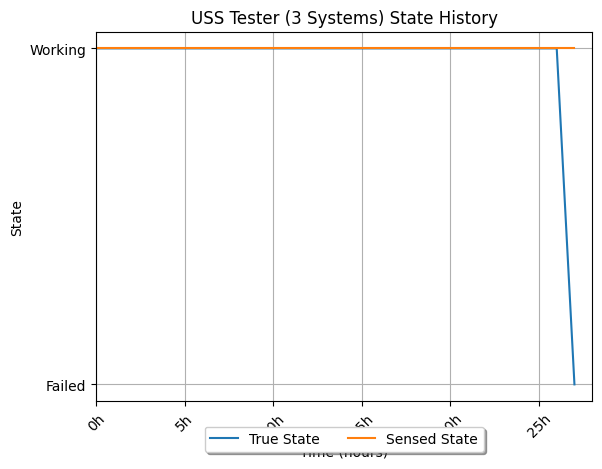

In [4]:
# initialize thee test systems with 7, 8, and 9 sensed components
sys4_comps = [SensedComp() for _ in range(7)]
sys4 = System("Test System 4", sys4_comps, 
              parallels=[(1,2,3),(4,5),(6,7)]) # debug parallel logic here

sys5_comps = [SensedComp() for _ in range(4)]
sys5 = System("Test System 4", sys5_comps, 
              parallels=[(2,3)])

sys6_comps = [SensedComp() for _ in range(3)]
sys6 = System("Test System 5", sys6_comps, 
              parallels = [(1,2)])

sys7_comps = [SensedComp() for _ in range(2)]
sys7 = System("Test System 6", sys7_comps)

# add the systems to a ship
ship3 = Ship("USS Tester (3 Systems)", [sys4, sys5, sys6, sys7], [(1,2), (3,4)])

# simulate the ship until it fails
i=0
while ship3.state != 0:
    ship3.simulate(1)  # Simulate for 1 hour
    i += 1
print(len(ship3.history))   # how many steps were simulated?

# plot the simulation history of the ship and the systems for comparison
ship3.plotHistory()
ship3.printHistory2Excel("testResults/Ship_w_Parallel_Sys.xlsx")